In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load the dataset
df = pd.read_csv("../results/outputs/feature_selected_telco_data.csv")
y = pd.read_csv("../results/outputs/feature_engineered_telco_data.csv")["Churn"]  # keep target variable

In [2]:
# Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

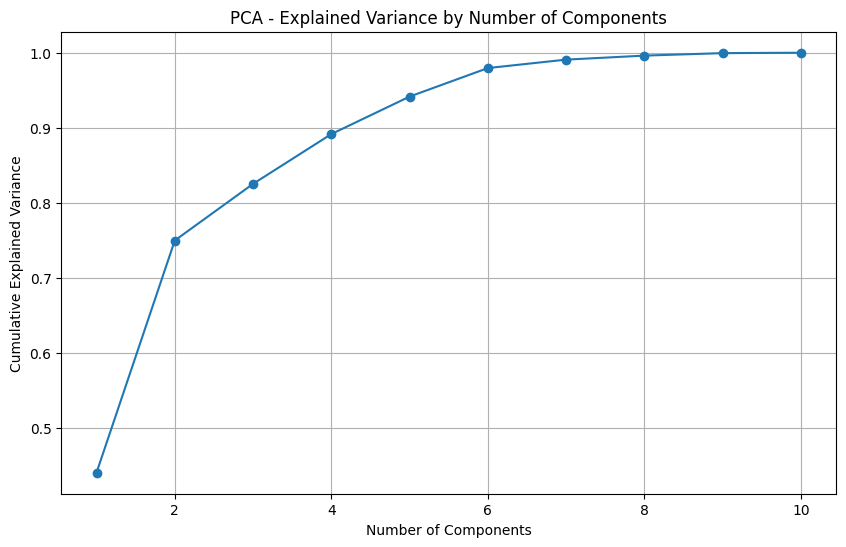

In [3]:
# PCA - Variance Explained
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_var)+1), explained_var.cumsum(), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance by Number of Components")
plt.grid(True)
plt.show()

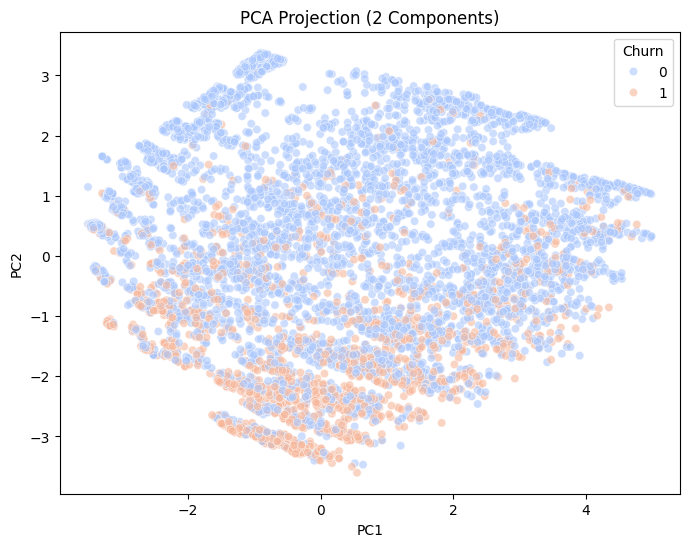

In [4]:
# PCA - 2D Visualization
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=y, palette="coolwarm", alpha=0.6)
plt.title("PCA Projection (2 Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Churn")
plt.show()

In [5]:
# Final Reduced Dataset (PCA with optimal components)
# Keeping enough components to explain ~90% variance
pca_final = PCA(n_components=10)
X_reduced = pca_final.fit_transform(X_scaled)

print("Original shape:", df.shape)
print("Reduced shape (PCA):", X_reduced.shape)

Original shape: (7043, 10)
Reduced shape (PCA): (7043, 10)


In [6]:
# Save the dataset
pd.DataFrame(X_reduced).to_csv("../results/outputs/final_preprocessed_telco_data.csv", index=False)